In [2]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



In [143]:
np.random.seed(42)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 -0.5
X = np.empty((m,3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) /2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) /2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [12]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [24]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [33]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [38]:
X.dot(W2)

array([[-0.89863792, -0.50222202],
       [ 1.18779706,  0.20426256],
       [ 0.79872069, -0.49097165],
       [ 0.06506939, -0.64587831],
       [-1.12180926,  0.12219394],
       [-1.00566419,  0.12646731],
       [-0.76030331,  0.50991263],
       [ 1.20756567,  0.02496183],
       [ 0.19919668, -0.6012478 ],
       [ 0.64353465, -0.54588393],
       [-0.67126337,  0.47881278],
       [ 1.07410529,  0.26947445],
       [ 1.1661164 , -0.1045285 ],
       [-1.17797985, -0.03139217],
       [-1.18075658,  0.00319006],
       [-1.26073316, -0.06330596],
       [-1.13626835, -0.36435744],
       [-0.22329935, -0.55603148],
       [-0.67867251, -0.60991516],
       [-1.08618234, -0.22587004],
       [ 0.18117221, -0.59261174],
       [-1.17846258,  0.05747593],
       [-1.14546389, -0.23379391],
       [-1.02160537, -0.40167509],
       [-0.62224961, -0.56080554],
       [ 1.07448449, -0.1667528 ],
       [-1.16067179,  0.09092224],
       [-0.40911151, -0.632017  ],
       [ 0.1313229 ,

In [61]:
W2 = Vt.T[:, :2]
X2D_old = X.dot(W2)

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [63]:
pca.explained_variance_ratio_


array([0.85406025, 0.13622918])

In [64]:
pca = PCA()
pca.fit(X)

PCA()

In [71]:
pca.explained_variance_ratio_

array([0.85406025, 0.13622918, 0.00971057])

In [83]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=  0.95) + 1

In [84]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

In [86]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)


X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1



Saving figure explained_variance_plot


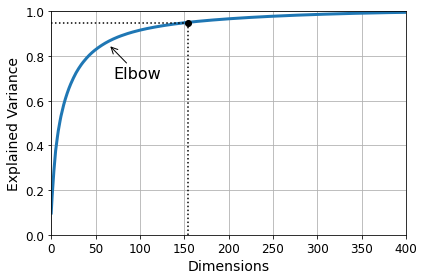

In [87]:

plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

In [91]:
pca = PCA(n_components=0.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [99]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [108]:
 def plot_digits(instances, images_per_row=5, **options):
     size=28
     image_per_row= min(len(instances), images_per_row)
     # this is equivalant to n_rows = ceil(len(instances)/ images_per_row)
     n_rows= (len(instances) -1) // images_per_row +1
     
     #append empty images to fill the end of the grid if needed
     n_empty = n_rows * images_per_row - len(instances)
     padded_instances = np.concatenate([  instances, np.zeros((n_empty, size*size))], axis=0)
     print(padded_instances)
     #reshape the array so it's organized as a grid constaiong 28x29 iamges:
     image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

     #combine axes 0 and 2 (vertical image grid axis, and vertical image axis)
     #and axes 1 and 3 (horizontal axes). We first need to move the axes that we
     #want to combine next to each other , using transpose(), and only then we
     # can reshape:
     big_image = image_grid.transpose(0,2,1,3).reshape(n_rows*size, images_per_row*size)
     plt.imshow(big_image, cmap= mpl.cm.binary, **options)
     plt.axis("off")

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[-1.82439295e-13 -9.99892151e-14  2.00465412e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-5.12459718e-13 -1.54892106e-13  7.37575590e-14 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.66329470e-14 -1.14062171e-13  2.87925702e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-3.59278114e-15  3.48917893e-13 -3.09938019e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.81546308e-14 -2.82835792e-13  3.01783040e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.18629662e-13  1.17903864e-13 -2.13374857e-13 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
Saving figure mnist_compression_plot


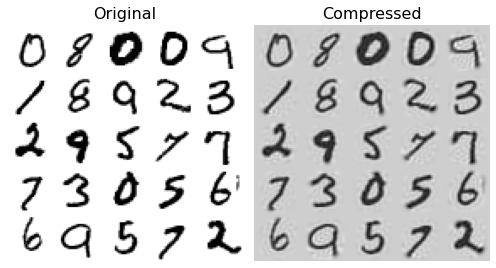

In [109]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

In [110]:
test = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [115]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

In [120]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=154)
batch = np.array_split(X_train,100)

test = [ipca.partial_fit(mini_batch) for mini_batch in batch]


In [126]:
X_reduced = ipca.transform(X_train)

In [127]:
X_reduced

array([[ 757.00108893,  183.96028546,  244.33183004, ...,   10.99345385,
         -36.47719772,   37.83338821],
       [-827.4060197 ,  247.17692705,  180.79180877, ...,    0.99971595,
           8.22530392,    8.93512179],
       [ 277.52246201, -622.38214925,  382.53407146, ...,    6.84787243,
          28.30879025,  -54.56207787],
       ...,
       [ 227.30793724,   31.21484522,  251.14449863, ...,   70.47767771,
          30.94909799, -139.53898983],
       [ 454.83113553,  133.13216504,  349.87271969, ...,   68.49147381,
         -11.49070067,    6.56636255],
       [ 303.5410653 ,  -19.39345319,  905.68926217, ...,   16.40053264,
         -43.06410531,   24.99050055]])

In [144]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

EXERCISE 8

In [9]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)



In [10]:
X = mnist["data"]
y = mnist["target"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000
                , random_state = 42)

In [20]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [13]:
from sklearn.metrics import accuracy_score
y_pred = forest_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9662

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)


In [24]:
pca.n_components_

154

In [19]:
forest_reduced_clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
forest_reduced_clf.fit(X_reduced, y_train)

RandomForestClassifier(n_jobs=-1)

In [25]:
X_reduced_test = pca.transform(X_test)

In [26]:

y_reduced_pred = forest_reduced_clf.predict(X_reduced_test)

accuracy_score(y_test, y_reduced_pred)

0.9463

In [27]:
X_reduced.shape

(60000, 154)

EXERCISE 10

In [38]:
np.random.seed(42)

m = 10000
idx = np.random.permutation(60000)[:m]

X = mnist['data'][idx]
y = mnist['target'][idx]

In [39]:
from sklearn.manifold import TSNE

tsne =  TSNE(n_components =2, random_state=42, n_jobs=-1)

In [40]:
X_reduced = tsne.fit_transform(X)

/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [41]:
len(X_reduced)

10000

In [50]:
X_reduced[:,0]

array([ 68.61322  , -34.113453 ,   9.200065 , ...,   5.252206 ,
        -6.7218833,  43.106766 ], dtype=float32)

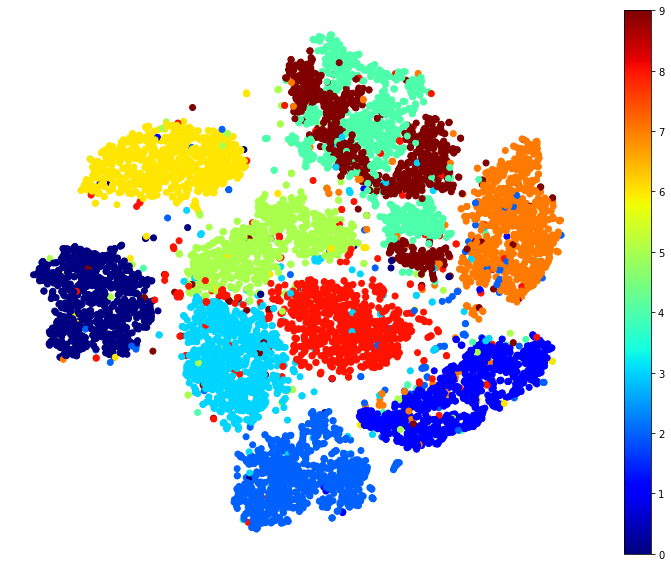

In [51]:
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis("off")
plt.colorbar()
plt.show()

<Figure size 648x648 with 0 Axes>

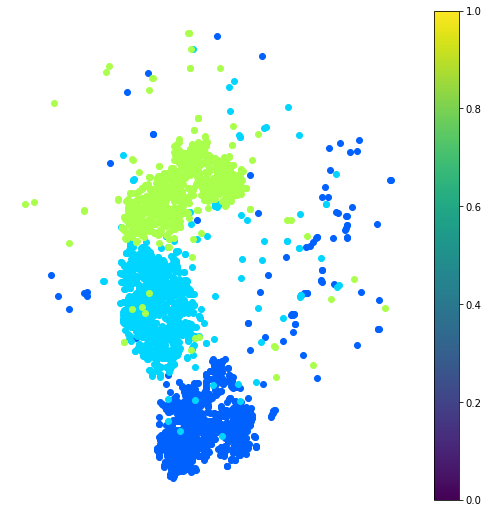

In [71]:
plt.figure(figsize=(9,9))
cmap = mpl.cm.get_cmap("jet")
for digit in (2, 3, 5):
    plt.scatter(X_reduced[y==digit,0], X_reduced[y==digit,1], c=[cmap(digit/9)])
plt.axis("off")
plt.colorbar()
plt.show()

In [72]:
idx = (y == 2) | (y == 3) | (y == 5) 
X_subset = X[idx]
y_subset = y[idx]

tsne_subset = TSNE(n_components=2, random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


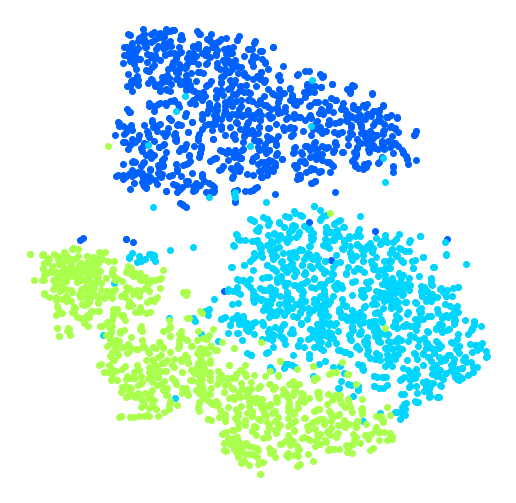

In [73]:
plt.figure(figsize=(9,9))
for digit in (2, 3, 5):
    plt.scatter(X_subset_reduced[y_subset == digit, 0], X_subset_reduced[y_subset == digit, 1], c=[cmap(digit / 9)])
plt.axis('off')
plt.show()

In [74]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)


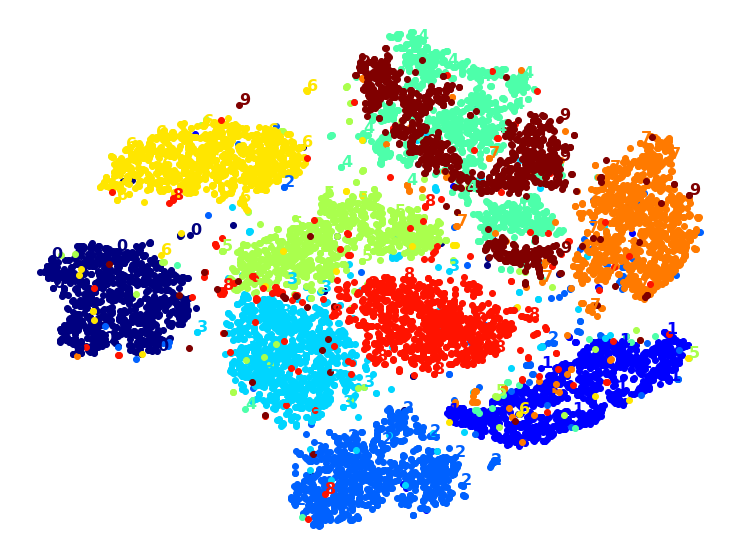

In [75]:
plot_digits(X_reduced, y)

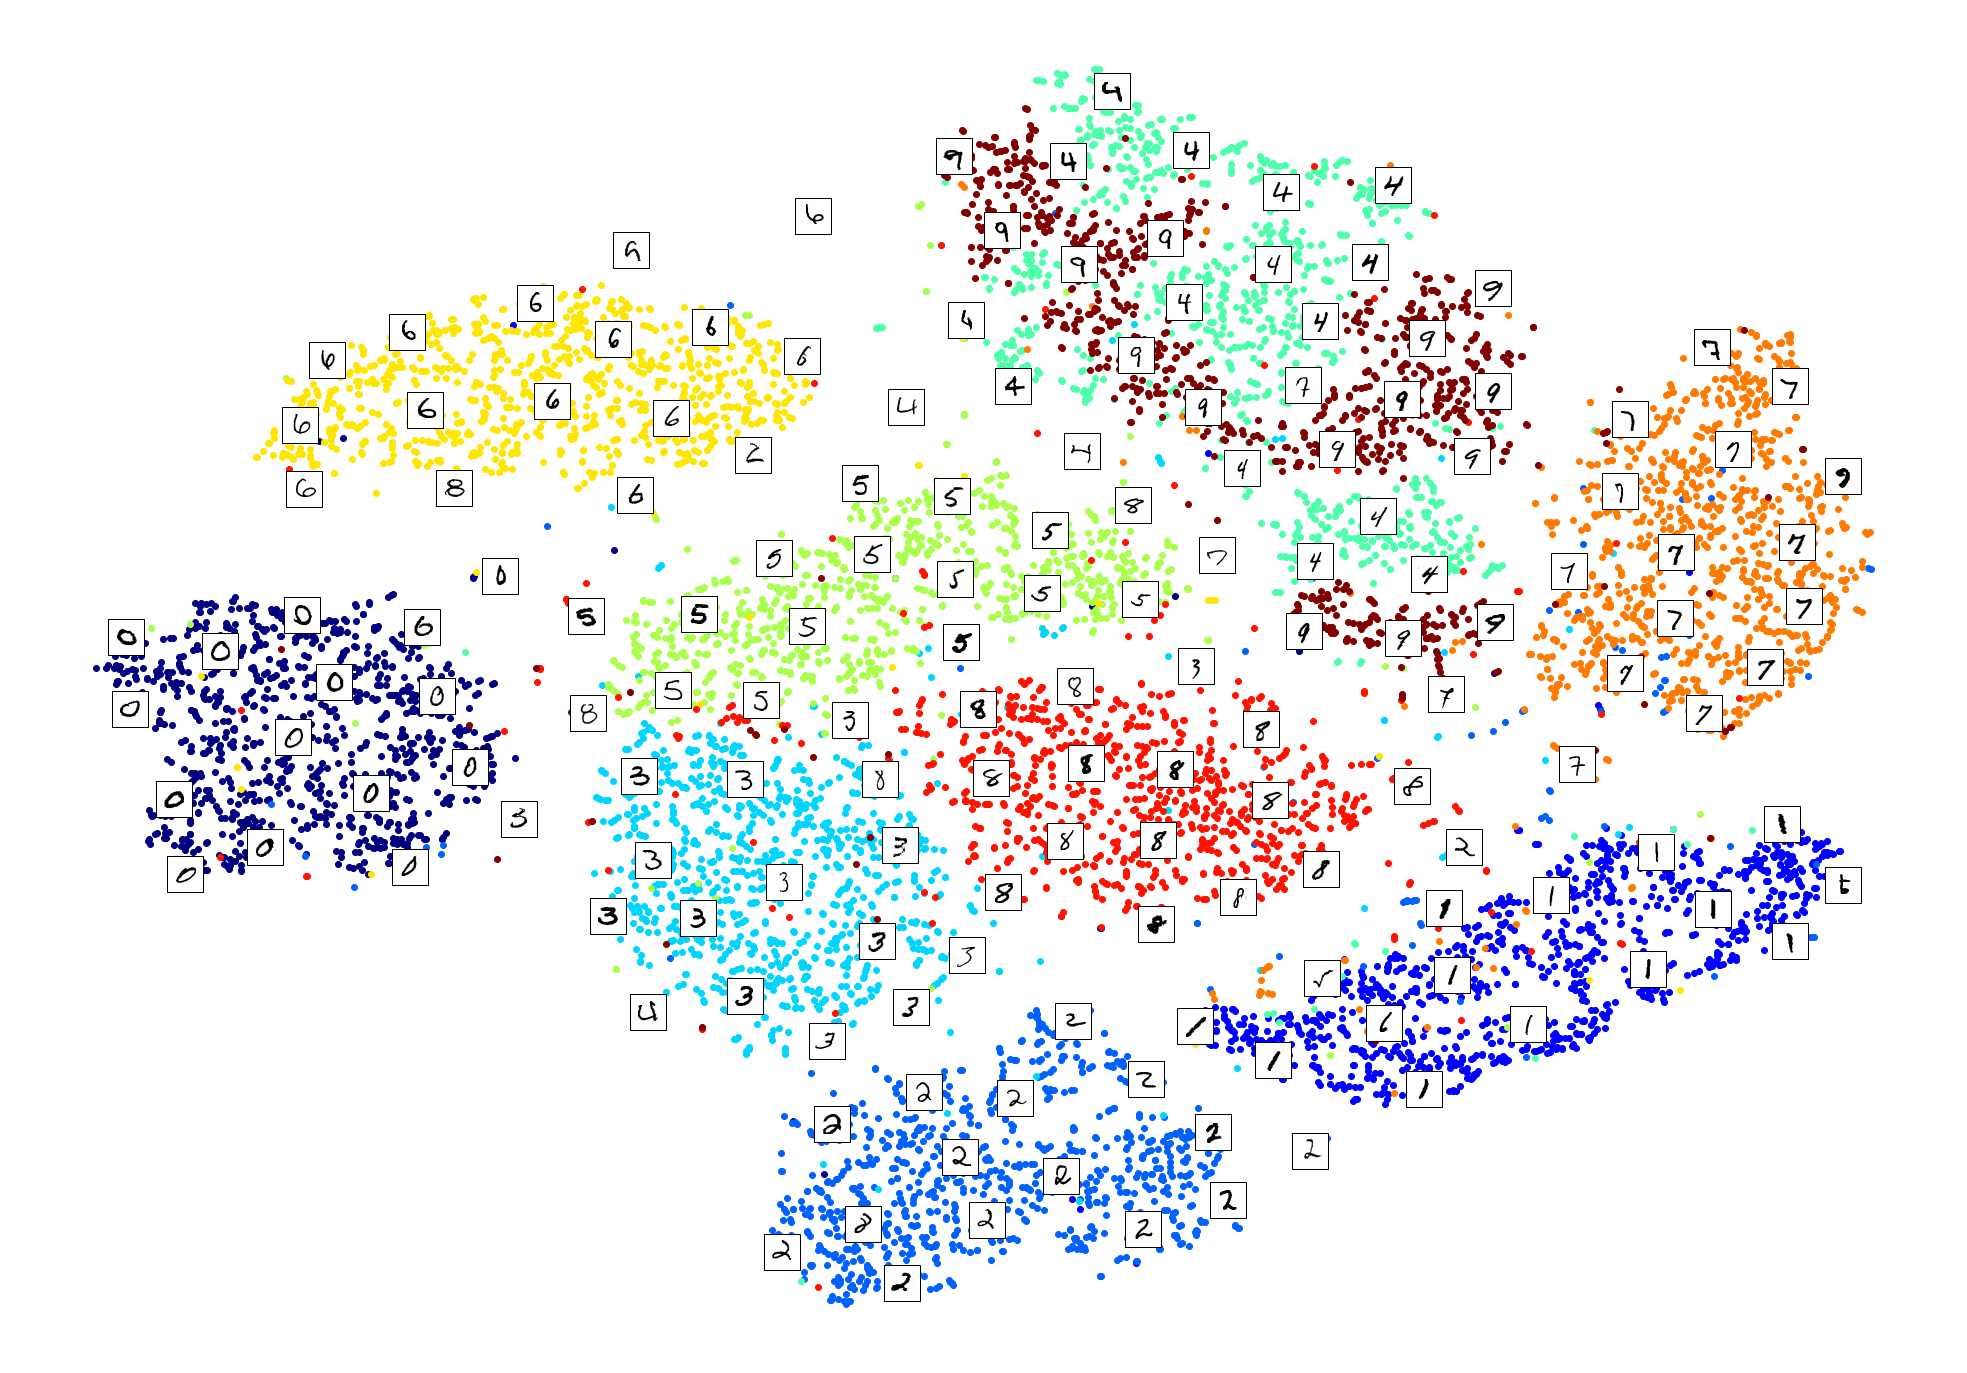

In [76]:
plot_digits(X_reduced, y, images=X, figsize=(35, 25))

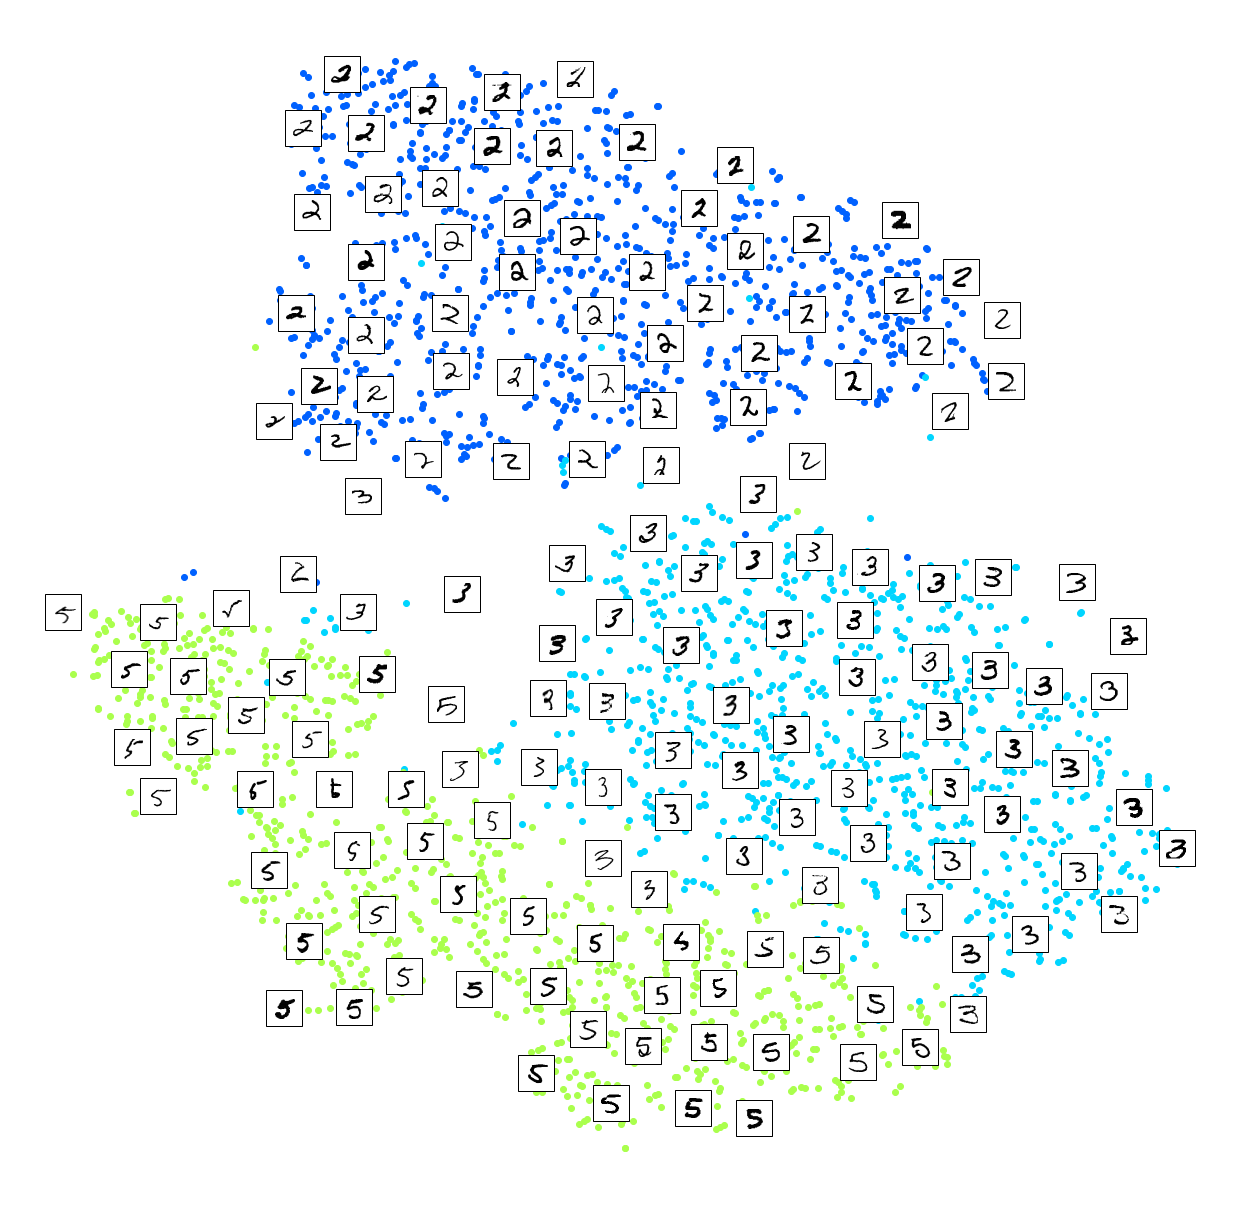

In [77]:
plot_digits(X_subset_reduced, y_subset, images=X_subset, figsize=(22, 22))


PCA took 1.8s.


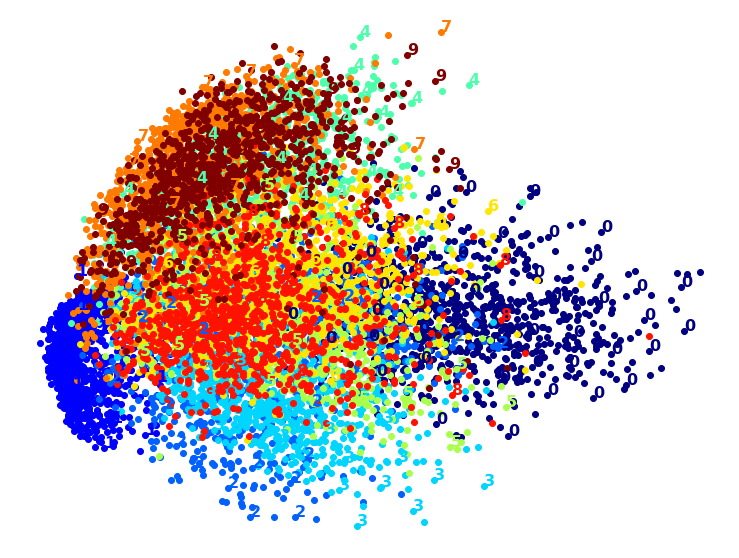

In [78]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_reduced, y)
plt.show()


LLE took 30.9s.


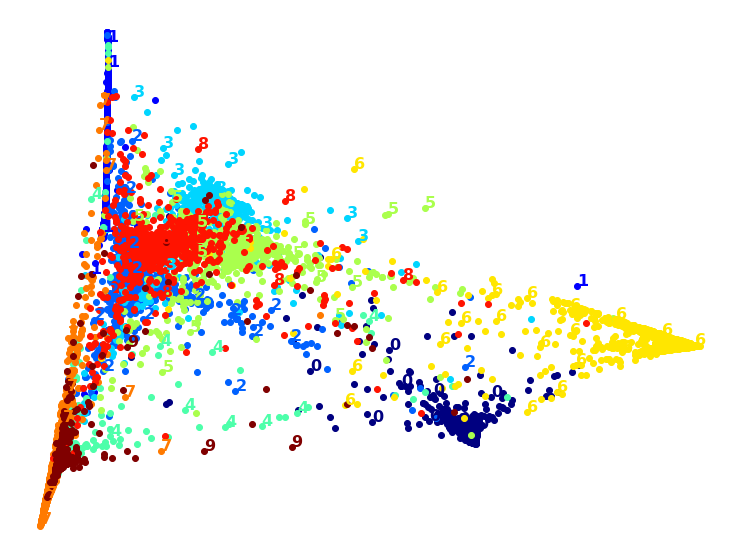

In [79]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_lle_reduced, y)
plt.show()

PCA+LLE took 33.0s.


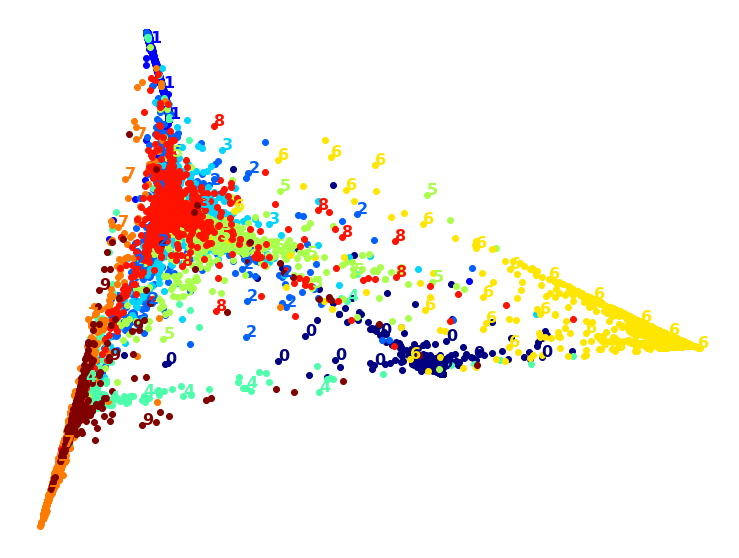

In [80]:
from sklearn.pipeline import Pipeline

pca_lle = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("lle", LocallyLinearEmbedding(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_lle_reduced = pca_lle.fit_transform(X)
t1 = time.time()
print("PCA+LLE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_lle_reduced, y)
plt.show()


MDS took 75.0s (on just 2,000 MNIST images instead of 10,000).


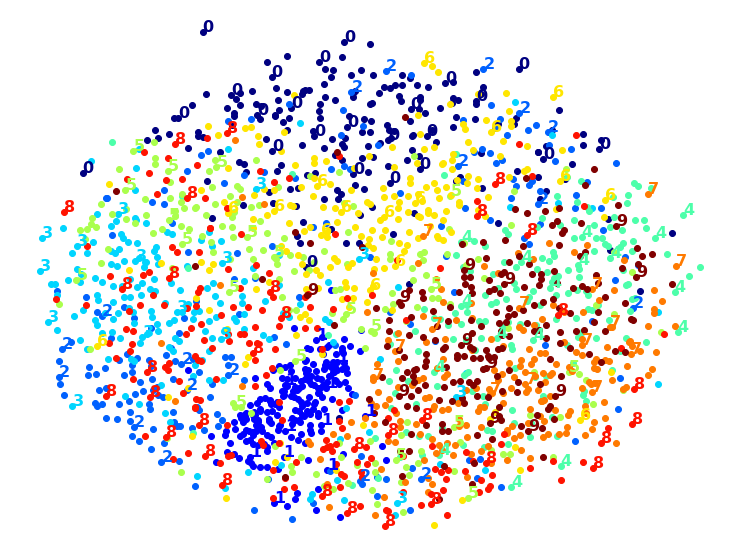

In [81]:
from sklearn.manifold import MDS

m = 2000
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X[:m])
t1 = time.time()
print("MDS took {:.1f}s (on just 2,000 MNIST images instead of 10,000).".format(t1 - t0))
plot_digits(X_mds_reduced, y[:m])
plt.show()

PCA+MDS took 78.8s (on 2,000 MNIST images).


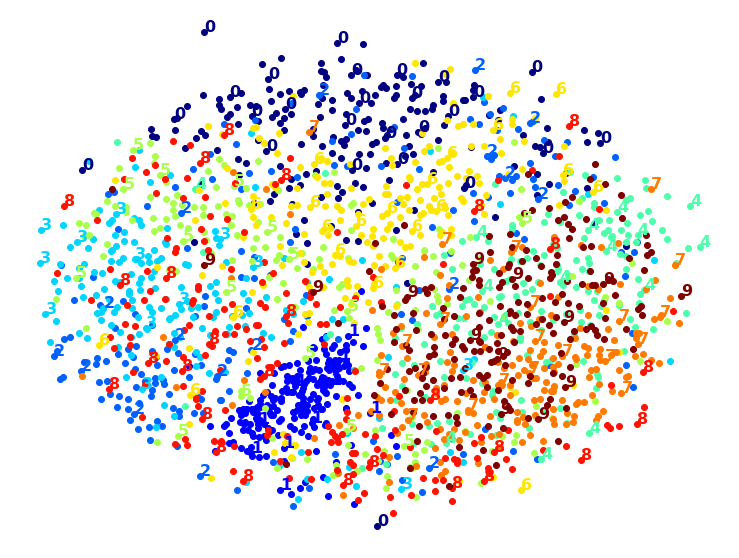

In [82]:
from sklearn.pipeline import Pipeline

pca_mds = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("mds", MDS(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_mds_reduced = pca_mds.fit_transform(X[:2000])
t1 = time.time()
print("PCA+MDS took {:.1f}s (on 2,000 MNIST images).".format(t1 - t0))
plot_digits(X_pca_mds_reduced, y[:2000])
plt.show()


LDA took 16.9s.


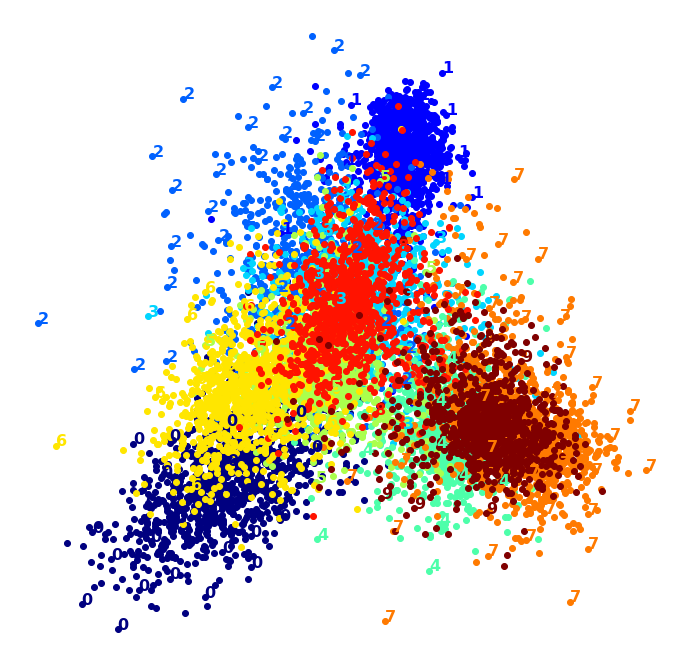

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

t0 = time.time()
X_lda_reduced = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, y)
t1 = time.time()
print("LDA took {:.1f}s.".format(t1 - t0))
plot_digits(X_lda_reduced, y, figsize=(12,12))
plt.show()

/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


t-SNE took 41.9s.


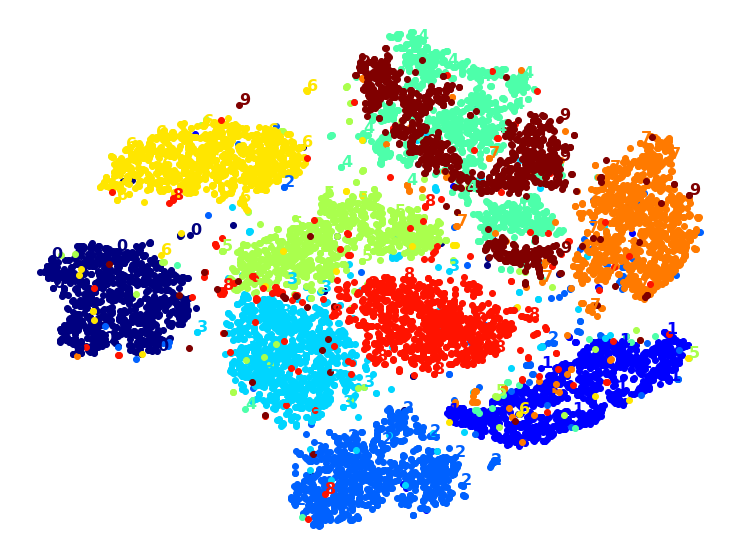

In [84]:
from sklearn.manifold import TSNE

t0 = time.time()
X_tsne_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)
t1 = time.time()
print("t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_tsne_reduced, y)
plt.show()


/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


PCA+t-SNE took 40.5s.


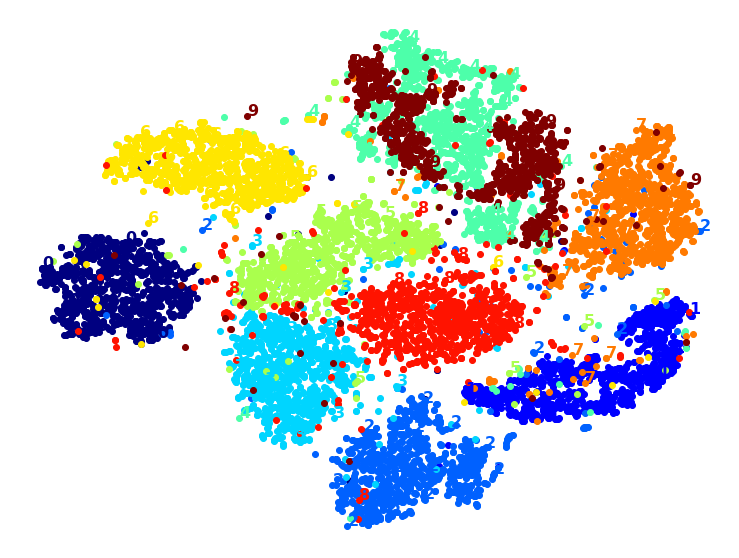

In [85]:


pca_tsne = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("tsne", TSNE(n_components=2, random_state=42)),
])
t0 = time.time()
X_pca_tsne_reduced = pca_tsne.fit_transform(X)
t1 = time.time()
print("PCA+t-SNE took {:.1f}s.".format(t1 - t0))
plot_digits(X_pca_tsne_reduced, y)
plt.show()

